# Section 3.1: Dekel profile fit

In [3]:
# IMPORTATIONS
import os
import sys
import time
from numpy import *
from matplotlib.pylab import *
from decimal import Decimal
import pickle
import inspect

import treal_functions
import general_functions
import slopes_functions
import prepare_functions
import fitting as fit
import cuspcore_aux
import cuspcore_plots
import evolving
import cuspcore_go

reload(treal_functions)
reload(general_functions)
reload(slopes_functions)
reload(prepare_functions)
reload(fit)
reload(cuspcore_aux)
reload(cuspcore_plots)
reload(evolving)
reload(cuspcore_go)

from general_functions import *
from slopes_functions import *
from prepare_functions import *
from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

# PARAMETERS
execfile("single_params.py")
directory='/cs/sci/freundlich/CUSPCORE/Michael/'
components=['d']

#Ttype='alpha-Mreal'
#Ttype='alpha-p-Mreal'

rmin_evolve=0.01
rmax_evolve=1
constrain_fit=True
constrain_evolution=True
linear_slopes=True

execfile("single_initialization.py")
execfile("single_load.py")


print 'Done on %s at %s'%(time.strftime("%x"),time.strftime("%X"))

Simulation g1.08e11
 
Loading existing file Treal-1.08e11.pickle
Reducing the range of gl
Reducing the range of Treal
 
Done on 06/11/19 at 19:54:02


In [4]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,16)
figsize=(8,6)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.95
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.95
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1


Parameters([('c', <Parameter 'c', value=15.444546909940314 +/- 0.347, bounds=[1e-16:inf]>), ('Rvir', <Parameter 'Rvir', value=135.942 (fixed), bounds=[None:None]>), ('Mvir', <Parameter 'Mvir', value=136153000000.0 (fixed), bounds=[None:None]>)])


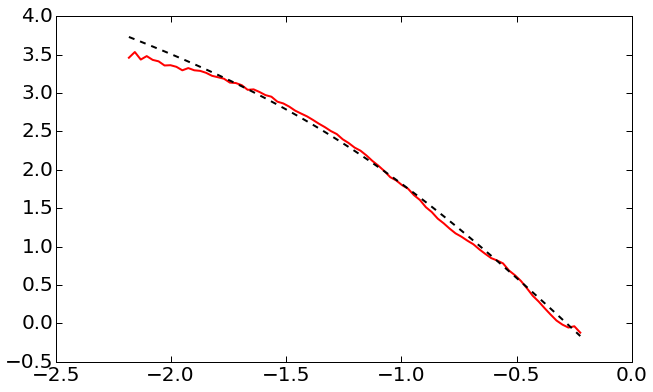

In [6]:
from lmfit import *

k=32
ss = gl[k]
a = array(ss['a'])
t = ss['t']
r = ss['d']['r']

brho = ss['d']['brho']
brhofit = ss['d'][fitname]['brho']
rho = ss['d']['rho']
rhofit = ss['d'][fitname]['rho']
p = ss['d'][fitname]['p']

Rvir=rvir_fangzhou[i]
Mvir=mvir_fangzhou[i]
R12=r12_fangzhou[i]
brhov = brho[-1]
rhov = rhov=Mvir/(4.*np.pi/3.*Rvir**3) #rho[-1]

def rho_nfw(r,pnfw):
    (c,Rvir,Mvir)=pnfw
    Rs=Rvir/c
    x=r/Rs
    rho0=Mvir/(4.*pi*Rs**3*(log(1.+c)-c/(1.+c)))
    return rho0/(x*(1.+x)**2)

def min_res(params, r, data, w=1):  
    pnfw=params2p(params)
    fun=rho_nfw(r, pnfw)
    return w*(log10(fun) - log10(data))

def params2p(params):
    c = params['c'].value
    Rvir = params['Rvir'].value
    Mvir = params['Mvir'].value
    p = (c, Rvir, Mvir)
    return p

params = Parameters()
params.add('c', value= 10, min=1.e-16, vary=True)
params.add('Rvir', value= float(Rvir), vary=False)
params.add('Mvir', value= float(Mvir), vary=False)

rmin_fit=0.01
rmax_fit=1.
maxr = rmax_fit*Rvir
minr = rmin_fit*Rvir
wcore = 0*(r<=minr)+1*((r>minr)&(r<=maxr))+0*(r>maxr)

result = minimize(min_res, params, args=(r, rho, wcore))
print params
    
figure()
plot(log10(r/Rvir),log10(rho/rhov),color='r',lw=2)
plot(log10(r/Rvir),log10(rho_nfw(r,params2p(params))/rhov),color='k',ls='--',lw=2)


time = 6.7 Gyr


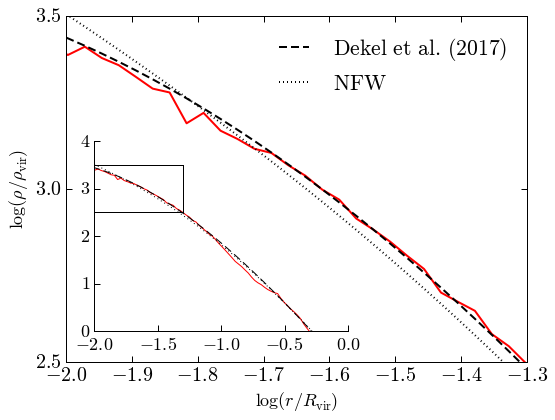

In [8]:
k=30
ss = gl[k]
a = array(ss['a'])
t = ss['t']
r = ss['d']['r']

brho = ss['d']['brho']
brhofit = ss['d'][fitname]['brho']
rho = ss['d']['rho']
rhofit = ss['d'][fitname]['rho']
p = ss['d'][fitname]['p']

Rvir=rvir_fangzhou[i]
Mvir=mvir_fangzhou[i]
R12=r12_fangzhou[i]
brhov = brho[-1]
rhov = rhov=Mvir/(4.*np.pi/3.*Rvir**3) #rho[-1]


figure(figsize=figsize)

plot(log10(r/Rvir),log10(rho/rhov),color='r',lw=2)
plot(log10(r/Rvir),log10(rhofit/rhov),'--', dashes=(8, 4),color='k',lw=2,label=r'$\rm Dekel$ $\rm et$ $\rm al.$ $\rm (2017)$')  
plot(log10(r/Rvir),log10(array(rho_nfw(r,params2p(params)))/rhov),':', color='k',lw=2,label=r'$\rm NFW$')
xlabel(r'$\log(r/R_{\rmvir})$')#,fontsize=textfont+2)
ylabel(r'$\log(\rho/\rho_{\rmvir})$')#,fontsize=textfont+2)
legend(loc='upper right',frameon=False)


xticknames=[r'$-2.0$',r'$-1.9$',r'$-1.8$',r'$-1.7$',r'$-1.6$',r'$-1.5$',r'$-1.4$',r'$-1.3$']
xticks([-2.,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3],xticknames,visible=True)
yticknames=[r'$2.5$',r'$3.0$',r'$3.5$']
yticks([2.5,3,3.5],yticknames,visible=True)
axis([-2,-1.3,2.5,3.5])

from mpl_toolkits.axes_grid.inset_locator import inset_axes
ax=gca()
inset_ax = inset_axes(ax, 
                    width="55%", # width = 30% of parent_bbox
                    height="55%", # height : 1 inch
                    #loc=3,
                    bbox_to_anchor=(-0.365, -0.33, 1, 1),
                    bbox_transform=ax.transAxes)

inset_ax.spines['right'].set_visible(False)
inset_ax.spines['top'].set_visible(False)
inset_ax.yaxis.set_ticks_position('left')
inset_ax.xaxis.set_ticks_position('bottom')
inset_ax.patch.set_alpha(0)

plot(log10(r/Rvir),log10(rho/rhov),color='r',lw=1)
plot(log10(r/Rvir),log10(rhofit/rhov),'--', dashes=(8, 4),color='k',lw=1,label='Dekel et al. (2017)')  
plot(log10(r/Rvir),log10(array(rho_nfw(r,params2p(params)))/rhov),':', color='k',lw=1,label='NFW & Einasto')

plot([-2,-1.3],[2.5,2.5],'k')
plot([-1.3,-1.3],[2.5,3.5],'k')
plot([-2,-1.3],[3.5,3.5],'k')

axis([-2,0,0,4])
xticknames=[r'$-2.0$',r'$-1.5$',r'$-1.0$',r'$-0.5$',r'$0.0$']
xticks([-2.,-1.5,-1.,-0.5,0],xticknames,visible=True,fontsize=fontsize-2)
yticknames=[r'$0$',r'$1$',r'$2$',r'$3$',r'$4$']
yticks([0,1,2,3,4],yticknames,visible=True,fontsize=fontsize-2)

print 'time = %.1f Gyr'%t
savefig('/vol/sci/astro/home/freundlich/CUSPCORE/ARTICLE/figures2/fig_dekel_nfw.pdf', bbox_inches='tight')

